#import dataset

In [33]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
website_phishing = fetch_ucirepo(id=379) 
  
# data (as pandas dataframes) 
X = website_phishing.data.features 
y = website_phishing.data.targets 
  
# metadata 
print(website_phishing.metadata) 
  
# variable information 
print(website_phishing.variables) 



{'uci_id': 379, 'name': 'Website Phishing', 'repository_url': 'https://archive.ics.uci.edu/dataset/379/website+phishing', 'data_url': 'https://archive.ics.uci.edu/static/public/379/data.csv', 'abstract': '\n\n', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1353, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C5B301', 'creators': ['Neda Abdelhamid'], 'intro_paper': {'ID': 440, 'type': 'NATIVE', 'title': 'Phishing detection based Associative Classification data mining', 'authors': 'Neda Abdelhamid, A. Ayesh, F. Thabtah', 'venue': 'Expert systems with applications', 'year': 2014, 'journal': None, 'DOI': '10.1016/j.eswa.2014.03.019', 'URL': 'https://www.semanticscholar.org/paper/867e2293e9780b729705b4ba48d6b1

In [34]:
X.head()
# df["having_IP_Address"].value_counts()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1,-1,1,-1,-1,1,1,1,0
1,-1,-1,-1,-1,-1,0,1,1,1
2,1,-1,0,0,-1,0,-1,1,0
3,1,0,1,-1,-1,0,1,1,0
4,-1,-1,1,-1,0,0,-1,1,0


In [35]:
X.columns


Index(['SFH', 'popUpWindow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address'],
      dtype='object')

In [36]:
X.replace(-1,0, inplace=True)
X.head()

C:\Users\ankus\AppData\Local\Temp\ipykernel_13400\497947289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(-1,0, inplace=True)


,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1,0,1,0,0,1,1,1,0
1,0,0,0,0,0,0,1,1,1
2,1,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,1,1,0
4,0,0,1,0,0,0,0,1,0


In [37]:
X.describe()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.566888,0.134516,0.555063,0.232816,0.425721,0.325203,0.265336,0.609756,0.114560
std,0.495689,0.341332,0.497143,0.422782,0.494635,0.468624,0.441675,0.487985,0.318608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
X.shape

(1353, 9)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Import Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


Data split into 1082 training samples and 271 testing samples.

Training the SVM model...
Model training complete. ✅

Evaluating model performance...

Model Accuracy: 0.8303

Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.87      0.87       140
           0       0.25      0.05      0.08        21
           1       0.80      0.93      0.86       110

    accuracy                           0.83       271
   macro avg       0.64      0.62      0.60       271
weighted avg       0.80      0.83      0.81       271


Displaying Confusion Matrix...


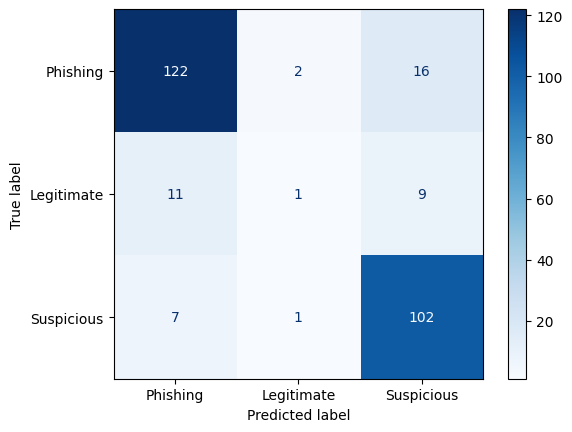

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

model = SVC(kernel='rbf', random_state=42)

print("\nTraining the SVM model...")
model.fit(X_train, y_train.values.ravel()) 
print("Model training complete. ✅")
print("\nEvaluating model performance...")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# The confusion matrix gives a visual representation of the model's performance,
# showing the number of correct and incorrect predictions for each class.
print("\nDisplaying Confusion Matrix...")
# Adjust display_labels to match the number of unique classes in y_test
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=['Phishing', 'Legitimate', 'Suspicious'],  # Adjust as appropriate for your class meanings
    cmap='Blues' # Use a blue color map for better visualization
)
plt.show()

In [41]:
import pickle
model_filename = 'phishing_svm_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"\nModel successfully saved to '{model_filename}'")



Model successfully saved to 'phishing_svm_model.pkl'
